In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
# full adder
# inputs  - 0=A 1=B 2=Carry in
# outputs - 2=Sum 3=Carry out 
fa=QuantumCircuit(4)
fa.ccx(0,1,3)
fa.cx(0,1)
fa.ccx(1,2,3)
fa.cx(1,2)
fa.cx(0,1)

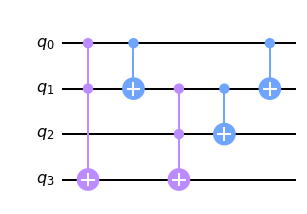

In [3]:
fa.draw('mpl')

In [4]:
fullAdder=fa.to_gate(label='fullAdder')

In [5]:
twoBitAdd=QuantumCircuit(7,3)
#
# example adds '10' and '11', should get output '101'
# comment out X gates to make input bits zero
#
#twoBitAdd.x(0)
twoBitAdd.x(1)
twoBitAdd.x(4)
twoBitAdd.x(5)
twoBitAdd.barrier([0,1,2,3,4,5,6])
twoBitAdd.append(fullAdder,[0,1,2,3])
twoBitAdd.append(fullAdder,[4,5,3,6])
twoBitAdd.barrier([0,1,2,3,4,5,6])
twoBitAdd.measure([2,3,6],[0,1,2])

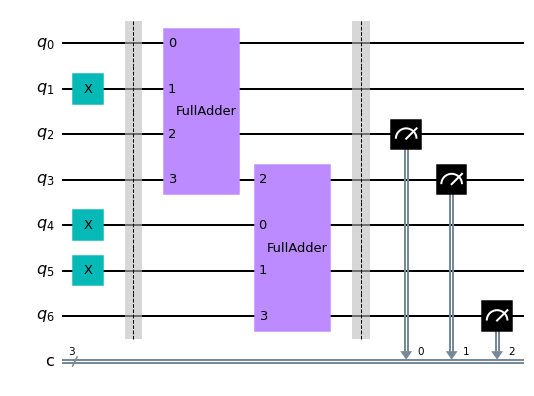

In [6]:
twoBitAdd.draw('mpl')

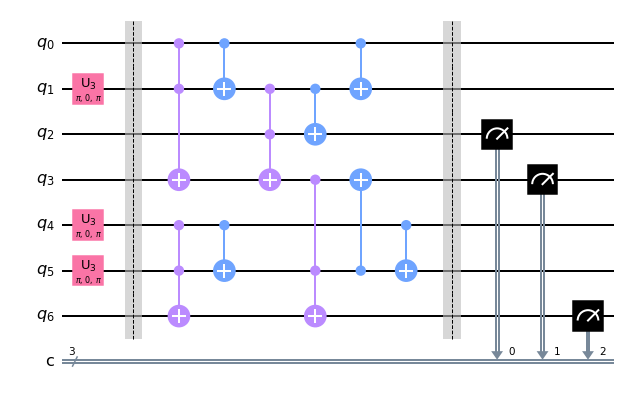

In [7]:
twoBitAdd.decompose().draw('mpl')

In [8]:
simulator=Aer.get_backend('qasm_simulator')
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

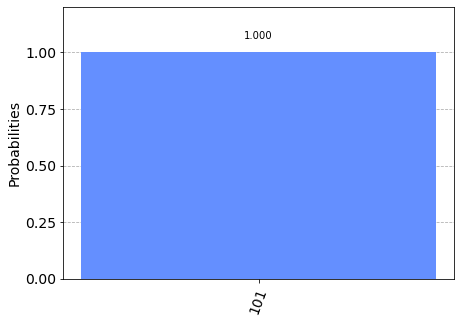

In [9]:
result=execute(twoBitAdd,backend=simulator).result()
plot_histogram(result.get_counts())

In [10]:
supAdd=QuantumCircuit(7,3)
#
# example adds superposition of all possible 2 qubit inputs
# output will be superposition of all possible sums
#
supAdd.h(0)
supAdd.h(1)
supAdd.h(4)
supAdd.h(5)
supAdd.barrier([0,1,2,3,4,5,6])
supAdd.append(fullAdder,[0,1,2,3])
supAdd.append(fullAdder,[4,5,3,6])
supAdd.barrier([0,1,2,3,4,5,6])
supAdd.measure([2,3,6],[0,1,2])

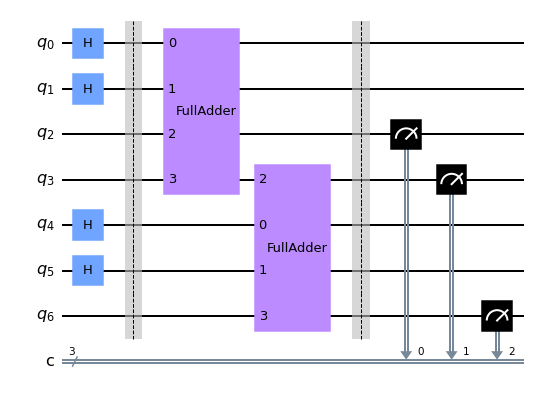

In [11]:
supAdd.draw('mpl')

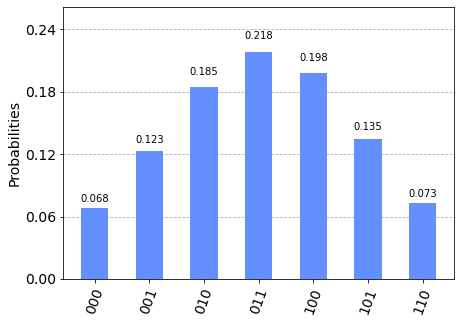

In [12]:
result=execute(supAdd,backend=simulator).result()
plot_histogram(result.get_counts())

In [13]:
bellAdd=QuantumCircuit(7,3)
#
# example adds two sets of |Φ+> Bell States, i.e. 2^(-0.5) * (|00> + |11>) 
# outputs will be |000> , |011>, |110>
#
bellAdd.h(0)
bellAdd.cx(0,4)
bellAdd.h(1)
bellAdd.cx(1,5)
bellAdd.barrier([0,1,2,3,4,5,6])
bellAdd.append(fullAdder,[0,1,2,3])
bellAdd.append(fullAdder,[4,5,3,6])
bellAdd.barrier([0,1,2,3,4,5,6])
bellAdd.measure([2,3,6],[0,1,2])

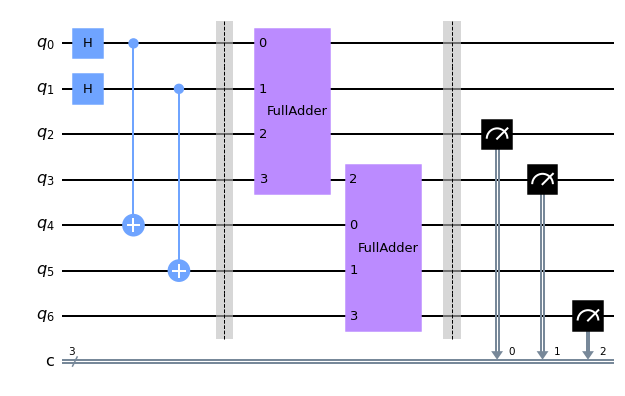

In [14]:
bellAdd.draw('mpl')

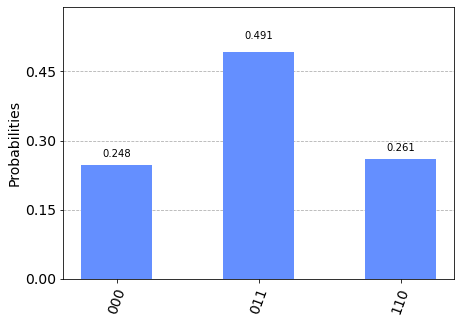

In [15]:
result=execute(bellAdd,backend=simulator).result()
plot_histogram(result.get_counts())